In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122519 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('대학백과_서울여대_리뷰.csv')
df

,Unnamed: 0,0
0,0,"1. 복수전공,부전공에 대한 허들이 낮아 다양한 전공을 공부해볼 수 있다. 2. 도..."
1,1,갠플이 심하지만 학교특성상 족보가 없어 불평등하게 성적이 주어지는 일이 없음. 열심...
2,2,전 사실 학교 되게 만족하면서 다니고 있어요 1. 일단 캠퍼스가 이쁨 봄 여름 가을...
3,3,1. 일문과 실습실 올해에는 실습실에서 다도체험도 했었어요 2. 교환학생 위에도 적...
4,4,여대는 갠플 성향이 너무 심해서 저랑 안맞았어요. 실제로 여대 분위기 때문에 입시에...
...,...,...
1499,1499,NaN
1500,1500,여대라서 개인플레이가 많다 이런 이야기가 있는데 전혀 그렇지 않아요. 그리고 취업시...
1501,1501,1학년때 자신이 원하는 전공과 교양을 들을수 있어서 좋아요. 교수님께서 상담도 잘해...
1502,1502,선후배 간의 사이가 좋고 캠퍼스 시설이 많이 좋아요


In [ ]:
df.columns =['index','리뷰']

In [ ]:
del df['index']

In [ ]:
df = df.dropna()
df

,리뷰
0,"1. 복수전공,부전공에 대한 허들이 낮아 다양한 전공을 공부해볼 수 있다. 2. 도..."
1,갠플이 심하지만 학교특성상 족보가 없어 불평등하게 성적이 주어지는 일이 없음. 열심...
2,전 사실 학교 되게 만족하면서 다니고 있어요 1. 일단 캠퍼스가 이쁨 봄 여름 가을...
3,1. 일문과 실습실 올해에는 실습실에서 다도체험도 했었어요 2. 교환학생 위에도 적...
4,여대는 갠플 성향이 너무 심해서 저랑 안맞았어요. 실제로 여대 분위기 때문에 입시에...
...,...
1497,자율전공에서 다양한 학과의 강의들을 수강해 볼 수 있었는데 이런 부분이 개인적으로 ...
1500,여대라서 개인플레이가 많다 이런 이야기가 있는데 전혀 그렇지 않아요. 그리고 취업시...
1501,1학년때 자신이 원하는 전공과 교양을 들을수 있어서 좋아요. 교수님께서 상담도 잘해...
1502,선후배 간의 사이가 좋고 캠퍼스 시설이 많이 좋아요


In [ ]:
review_text = ''
for temp in df['리뷰']:
    review_text += str(temp)
review_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',review_text)
review_text

'1  복수전공 부전공에 대한 허들이 낮아 다양한 전공을 공부해볼 수 있다  2  도서관 리모델링해서 시설이 좋다 3  학생들의 학업성취도가 뛰어나서 자극된다 갠플이 심하지만 학교특성상 족보가 없어 불평등하게 성적이 주어지는 일이 없음  열심히한만큼 성적을 받는다  실험수업 레포트로 밤새는건 일상  한학기에 실험수업 2개 들으면 매주 레포트는 2개씩 제출  시험전날에도 레포트를 쓸 수 있다    팀플 발표수업 없음  혼자하는 능력이 뛰어난 학생이 오면 잘할듯  생명이나 화학 하나에만 관심있는 학생이고 만약 둘중하나를 극혐한다면 이 학과 비추   물리 수학 수업이 없어 문과학생이 교차에서 오는 경우에도 잘 따라갈수 있음  물론 이건 배워야하는건데 안배우는거니까 미분적분학같은 경우는 대개 타과과목 수강함 학교에 개선요구중  대신 생명 화학은 둘다 깊게 배울 수 있다     2학년때 과 정하지만 그 전까지 두 과목을 다 1학년 전필로 깊게 배움  3명팀티칭 생명수업과 모든 화학전공은 한학기에 시험을 3번씩 친다   중간1 중간2 기말     공부는 진짜 끝장나게 할 수 있다    전 사실 학교 되게 만족하면서 다니고 있어요 1  일단 캠퍼스가 이쁨 봄 여름 가을 겨울 다 다른 매력으로 예뻐요 혼자 노래 들으면서 걸어다니다 보면 힘들다가도 힐링됨   2  대면 수업이 많아지다보니 학우들과의 교류도 많아졌어요 개강총회 했을 때 넘 재밌었어요 다같이 술마시니까 상상했던 대학 생활 느낌 그리고 전공 수업 때 친구들이랑 같이 들으니까 진짜 좋았어요 갑자기 과제나오면 다같이 절망하고   3  교환학생 제도 인서울 하위권 대학임에도 불구하고 March 라인 중 하나인 아오야마 대학과 교환학생 할 수 있다는 것   진짜 큰 장점인것같아요 심지어 일본권 교환학생은 전부 등록금 본교납부라는 점   4  복수 전공  전과 쉬움 업계에서 알아주다시피 하는 학과 말고는 쉬운편이라고 생각해요 5  취업 관련 부서가 일을 잘하시는 것같음 1학년 때 진로상담하러가니까 저학년인데 잘왔다부터 그냥

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(review_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('1', 'Number'), ('복수', 'Noun'), ('전공', 'Noun'), ('부', 'Noun'), ('전공', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('허들', 'Noun'), ('이', 'Josa'), ('낮아', 'Adjective'), ('다양한', 'Adjective'), ('전공', 'Noun'), ('을', 'Josa'), ('공부', 'Noun'), ('해볼', 'Verb'), ('수', 'Noun'), ('있다', 'Adjective'), ('2', 'Number'), ('도서관', 'Noun'), ('리', 'Noun'), ('모델링', 'Noun'), ('해서', 'Verb'), ('시설', 'Noun'), ('이', 'Josa'), ('좋다', 'Adjective'), ('3', 'Number'), ('학생', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('학업성취도', 'Noun'), ('가', 'Josa'), ('뛰어나서', 'Adjective'), ('자극', 'Noun'), ('된다', 'Verb'), ('갠플', 'Noun'), ('이', 'Josa'), ('심하지만', 'Adjective'), ('학교', 'Noun'), ('특성', 'Noun'), ('상', 'Suffix'), ('족보', 'Noun'), ('가', 'Josa'), ('없어', 'Adjective'), ('불평등하게', 'Adjective'), ('성적', 'Noun'), ('이', 'Josa'), ('주어지는', 'Verb'), ('일이', 'Modifier'), ('없음', 'Adjective'), ('열심히', 'Adverb'), ('한', 'Determiner'), ('만큼', 'Noun'), ('성적', 'Noun'), ('을', 'Josa'), ('받는다', 'Verb'), ('실험', 'Noun'), ('수업', 'Noun'), ('레포트', 'Noun'), ('로',

In [ ]:
#제외할 단어 추가
stop_words = "서울여대 학교 때문 입니다 학생 대학 여자 여대 정말 학년" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('교수', 495),
 ('학과', 445),
 ('수업', 293),
 ('전공', 292),
 ('생각', 286),
 ('학우', 249),
 ('캠퍼스', 225),
 ('좋은', 219),
 ('있는', 211),
 ('분위기', 211),
 ('단점', 206),
 ('바롬', 189),
 ('취업', 185),
 ('좋아요', 175),
 ('장점', 167),
 ('있어요', 166),
 ('선배', 158),
 ('있습니다', 155),
 ('같아요', 154),
 ('공부', 147),
 ('사람', 147),
 ('친구', 132),
 ('학점', 125),
 ('하나', 123),
 ('프로그램', 120),
 ('강의', 118),
 ('있고', 118),
 ('있어서', 111),
 ('주변', 110),
 ('교양', 109),
 ('서울', 107),
 ('많은', 107),
 ('우리', 107),
 ('다양한', 105),
 ('학기', 103),
 ('다른', 102),
 ('저희', 101),
 ('선택', 99),
 ('좋고', 97),
 ('없어요', 97),
 ('정도', 96),
 ('추천', 94),
 ('열정', 93),
 ('진짜', 90),
 ('별로', 88),
 ('생활', 86),
 ('지원', 86),
 ('커리큘럼', 86),
 ('편이', 85),
 ('매우', 85),
 ('많아서', 84),
 ('합숙', 82),
 ('느낌', 81),
 ('장학금', 80),
 ('기회', 80),
 ('없고', 79),
 ('자신', 77),
 ('관심', 76),
 ('그냥', 76),
 ('좋습니다', 76),
 ('도움', 74),
 ('서로', 74),
 ('활동', 74),
 ('사업', 73),
 ('필수', 71),
 ('분야', 70),
 ('진로', 69),
 ('많아요', 69),
 ('대한', 68),
 ('같은', 68),
 ('또한', 68),
 ('없는', 67),
 ('모두', 

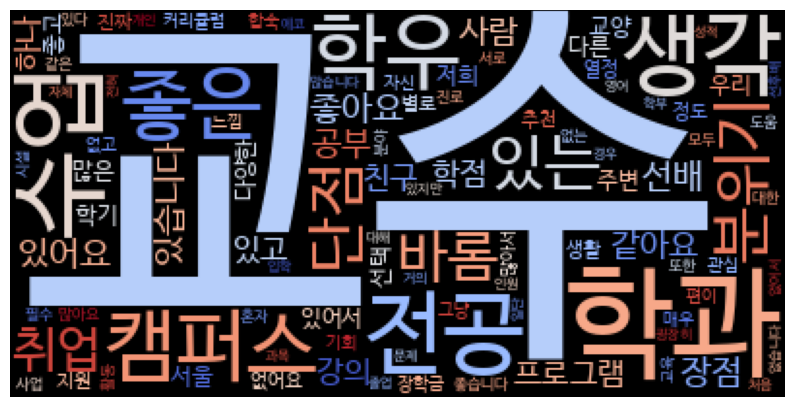

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('대학백과_서울여대_리뷰_워드클라우드.png', bbox_inches='tight')
plt.show()

In [ ]:
# 워드클라우드 복붙
wordcloud_1 = str(tags)
wordcloud_1 = wordcloud_1.replace("'",' ')
wordcloud_1

'[( 교수 , 495), ( 학과 , 445), ( 수업 , 293), ( 전공 , 292), ( 생각 , 286), ( 학우 , 249), ( 캠퍼스 , 225), ( 좋은 , 219), ( 있는 , 211), ( 분위기 , 211), ( 단점 , 206), ( 바롬 , 189), ( 취업 , 185), ( 좋아요 , 175), ( 장점 , 167), ( 있어요 , 166), ( 선배 , 158), ( 있습니다 , 155), ( 같아요 , 154), ( 공부 , 147), ( 사람 , 147), ( 친구 , 132), ( 학점 , 125), ( 하나 , 123), ( 프로그램 , 120), ( 강의 , 118), ( 있고 , 118), ( 있어서 , 111), ( 주변 , 110), ( 교양 , 109), ( 서울 , 107), ( 많은 , 107), ( 우리 , 107), ( 다양한 , 105), ( 학기 , 103), ( 다른 , 102), ( 저희 , 101), ( 선택 , 99), ( 좋고 , 97), ( 없어요 , 97), ( 정도 , 96), ( 추천 , 94), ( 열정 , 93), ( 진짜 , 90), ( 별로 , 88), ( 생활 , 86), ( 지원 , 86), ( 커리큘럼 , 86), ( 편이 , 85), ( 매우 , 85), ( 많아서 , 84), ( 합숙 , 82), ( 느낌 , 81), ( 장학금 , 80), ( 기회 , 80), ( 없고 , 79), ( 자신 , 77), ( 관심 , 76), ( 그냥 , 76), ( 좋습니다 , 76), ( 도움 , 74), ( 서로 , 74), ( 활동 , 74), ( 사업 , 73), ( 필수 , 71), ( 분야 , 70), ( 진로 , 69), ( 많아요 , 69), ( 대한 , 68), ( 같은 , 68), ( 또한 , 68), ( 없는 , 67), ( 모두 , 66), ( 있다 , 65), ( 시설 , 65), ( 혼자 , 65), ( 교육 , 65), ( 있지만 , 64), ( 일단 